#**INTRODUCTION**


###Credit card:-
#####A credit card is a thin rectangular piece of plastic or metal issued by a bank or financial services company that allows cardholders to borrow funds with which to pay for goods and services with merchants that accept cards for payment. Credit cards impose the condition that cardholders pay back the borrowed money, plus any applicable interest, as well as any additional agreed-upon charges, either in full by the billing date or over time.

###Advantages of credit card :-
* Earn rewards such as cash back or miles points.

* Protection against credit card fraud.

* Credit score information for free.

* No foreign transaction fees.

* Increased purchasing power.

* Not linked to checking or savings account.

* Putting a hold on a rental car or hotel room.

###Eligibilty for creditcard :-
* Age 
* Income 
* Residency 
* Citizenship

* 1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
    * A) In today's world, where online transactions have become the norm, credit card fraud has become a major concern for banks and financial institutions. It is essential for banks to accurately predict whether a client is a good or bad credit risk to minimize the risk of financial losses from default or fraud. This is where credit card approval prediction comes in.


* 2) How is it going to impact the banking sector?

    * By analyzing a customer's credit history, income, employment status, and other relevant data, banks can predict the likelihood of a customer defaulting on their credit card payments. This can help the bank make informed decisions on whether or not to approve a credit card application and what credit limit to assign.

* 3) What is the gap in the knowledge or how you proposed method can be helpful?

    * Predicting a good client is important for a bank for several reasons.  
    * It helps the bank minimize the risk of financial loss due to default or fraud. 
    *It helps the bank determine an appropriate credit limit for the customer, which can help prevent the customer from accumulating debt they can't repay. 
    * It helps the bank identify potential high-value customers who are likely to spend more on their credit cards and generate more revenue for the bank.

#**GATHERING DATA**

In [173]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [174]:
#Importing Credit Card dataset using read_csv in pandas.
df_credit_card = pd.read_csv("Credit_card.csv")

#Dataset of Credit Card has 1548 'records' and 18 'features'.
df_credit_card.shape

(1548, 18)

In [175]:
#Importing Credit Card Label dataset using read_csv in pandas.
df_label = pd.read_csv("Credit_card_label.csv")

#Dataset of Credit Card labels has 1548 'records' and 2 'features'.
df_label.shape

(1548, 2)

In [176]:
#Combining common datset using merge on "Ind_ID" column.
df = pd.merge(df_credit_card, df_label, on='Ind_ID', how='inner')

#Dataset of Credit Card 1548 'records' and 19 'features'.
df.shape

(1548, 19)

##**BASIC EXPLORATION**


###Columns description:-
FIRST FILE (Credit_card.csv)
* Ind_ID: Client ID

* Gender : Gender information

* Car_owner : Having car or not

* Propert_owner : Having property or not

* Children : Count of children

* Annual_income : Annual income

* Type_Income : Income type

* Education : Education level

* Marital_status : Marital_status

* Housing_type : Living style

* Birthday_count : Use backward count from current day (0), -1 means yesterday.

* Employed_days : Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

* Mobile_phone : Any mobile phone

* Work_phone : Any work phone

* Phone : Any phone number

* EMAIL_ID : Any email ID

* Type_Occupation : Occupation

* Family_Members : Family size

SECOND FILE (Credit_card_label.csv)


* ID : The joining key between application data and credit status data, same is Ind_ID

* Label : 0 is application approved and 1 is application rejected.

###Data Pre-Processing


In [177]:
#"head()" used to get first 5 rows of dataset.
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [178]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


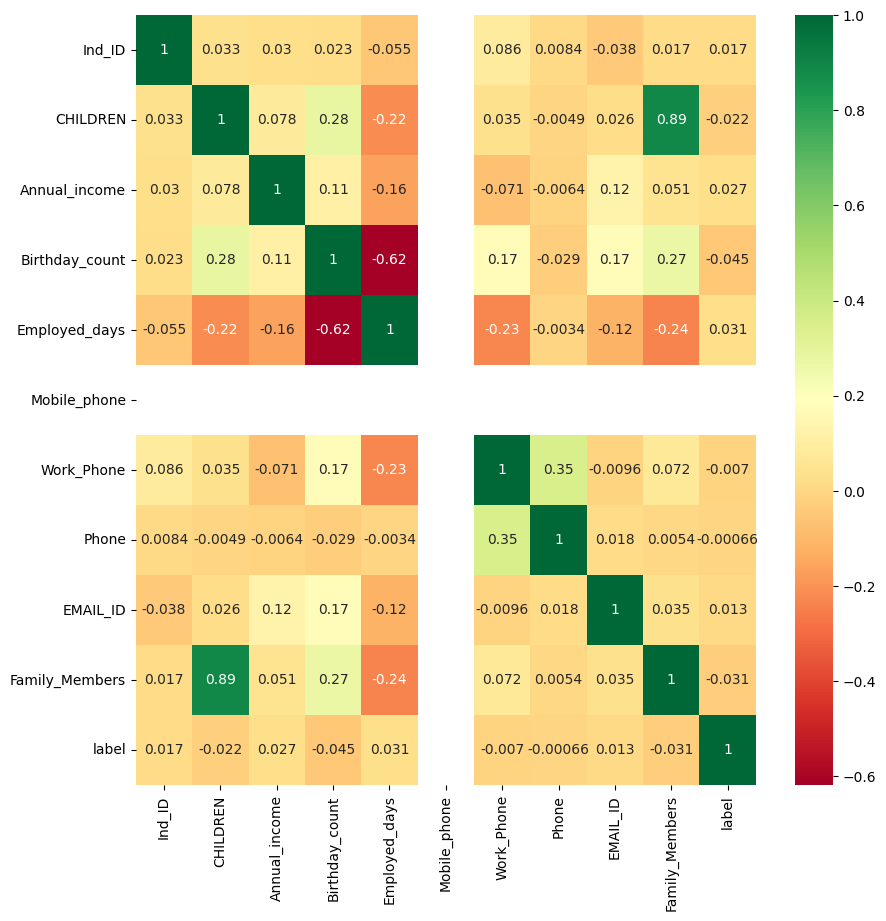

In [179]:
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

Observation :-  

* Numerical features - Annual Income, Birthday count, Employeed Days, Family Members and Children are more likely correlated to Credit Card Approval.
* Birthday count and Family Members are inversely correlated to "Label".
* Other are directly correlated.

In [180]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [181]:
#Dataset of Credit Card has 1548 rows and 19 columns.
df.shape

(1548, 19)

There are 1548 Samples with 19 featues.

In [182]:
#"isnull().sum()" give total null values in each column in dataset.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [183]:
#"isnull().sum().sum()" gives total null values.
df.isnull().sum().sum()

540

There are total 540 Missing values :- 

(May be) 

* MCAR - Data not collected accordingly.
* MAR - Data not filled properly by customers.
* MNAR - Data not filled intensionly.

In [184]:
df.isnull().mean()*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

Observations :- 
* There are missing values in 4 features :- 
* Gender = 0.45%
* Annual Income = 1.48%
* Age = 1.42%
* Type of Occupation = 31.5%

In [185]:
# #Extracting out the values count in each column using loop and "value_counts()".
# for i in df.columns[1:]:
#   print(df[i].value_counts())
#   print("-------------------")

#**FEATURE ENGINEERING**

###Feature Transformation

Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column (feature) and transform the values, which are useful for our further analysis. It is a technique by which we can boost our model performance. It is also known as "Feature Engineering", which creates new features from existing features that may help improve the model performance.

#####Column : Birthday Count --> Age

*   In the dataset, there are some negative values in which needs to be converted.
*   In "Employed_days", 0 or positive value should be 0 as "Experience".
* In "Birthday_count", negative value indicates birthday days.
*   "Birthday_count" and "Employed_days" columns need to converted into years with positive value in it.




In [186]:
print(df.shape)
df[df["Birthday_count"]>=0]

(1548, 19)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [187]:
#Renaming the "Birthday_count" to "Age" by dividing 365.
df.rename(columns = {"Birthday_count" : "Age"}, inplace=True) 
df["Age"] = round(abs(df["Age"]/365))
# df[df["Employed_days"]>=0].head()

#####Column : Employed Days --> Experience

In [188]:
print(df.shape)
df["Employed_days"][df["Employed_days"]>=0] = 0

(1548, 19)


In [189]:
#Renaming the "Employed_days" to "Experience" by dividing 365.
df.rename(columns = {"Employed_days" : "Experience"}, inplace=True) 
df["Experience"] = round(abs(df["Experience"]/365),1)

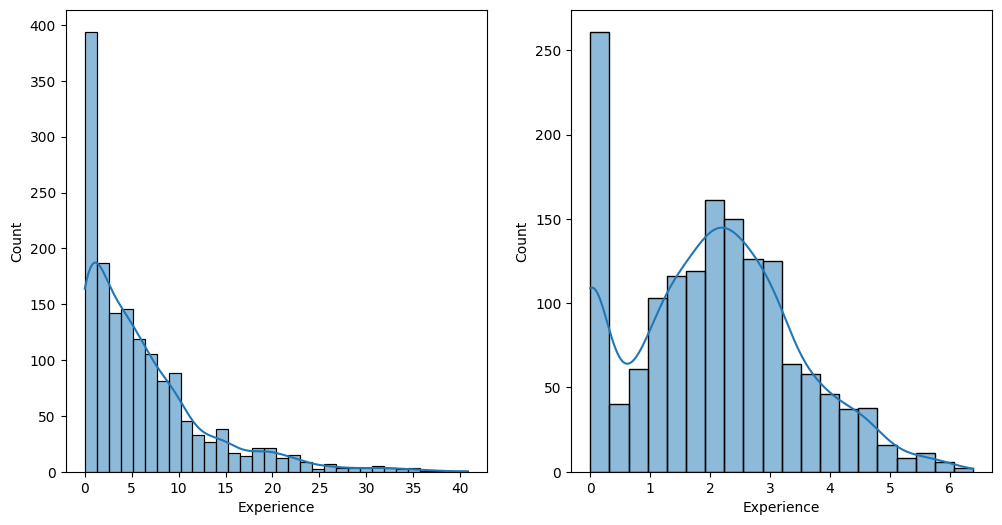

In [190]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.histplot(df["Experience"], kde = True)

plt.subplot(1, 4, 2)
sns.histplot(np.sqrt(df["Experience"]), kde = True)
plt.show()

In [191]:
#Replacing the feature with transformed figure that is Square-Root Transformation
df["Experience"] = np.sqrt(df["Experience"])

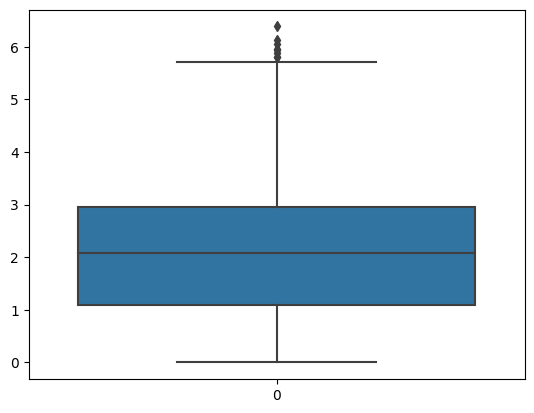

In [192]:
sns.boxplot(df["Experience"])
plt.show()

<Axes: xlabel='Experience', ylabel='Count'>

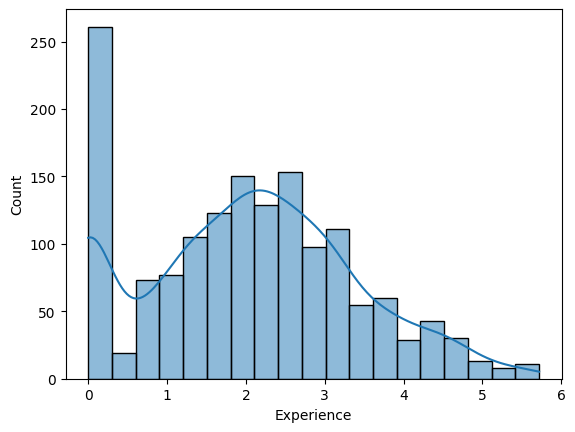

In [193]:
q3_exp = df["Experience"].quantile(0.75)
q1_exp = df["Experience"].quantile(0.25)
iqr_exp = q3_exp - q1_exp
upper_exp = q3_exp + (1.5*iqr_exp)
lower_exp = q1_exp - (1.5*iqr_exp)

#Replacing outliers with NAN value.
for i in df["Experience"]:
  if i > upper_exp:
    df["Experience"].replace(i,np.nan, inplace = True)

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
knn_imputer_exp = SimpleImputer(strategy='median') 
exp_reshape = np.array(df["Experience"]).reshape(-1, 1)
df["Experience"] = knn_imputer_exp.fit_transform(exp_reshape)
sns.histplot(df["Experience"], kde = True)

#####Column : Annual Income

<Axes: xlabel='Annual_income', ylabel='Count'>

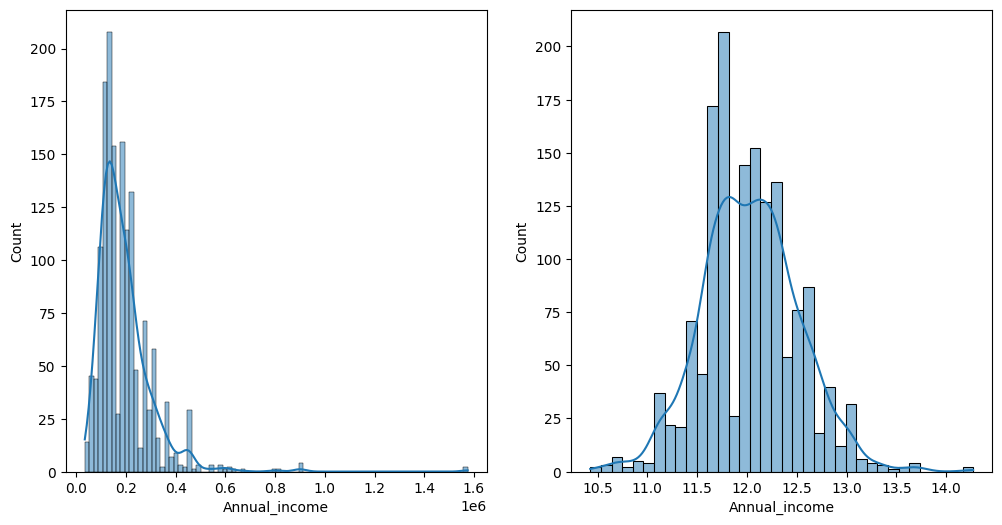

In [194]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.histplot(df["Annual_income"], kde = True)

plt.subplot(1, 4, 2)
sns.histplot(np.log(df["Annual_income"]), kde = True)

In [195]:
#Replacing the feature with transformed figure that is Log Transformation
df["Annual_income"] = np.log(df["Annual_income"])

In [196]:
# q3_income = df["Annual_income"].quantile(0.75)
# q1_income = df["Annual_income"].quantile(0.25)
# iqr_income = q3_income - q1_income
# upper_income = q3_income + (1.5 * iqr_income)
# inner_income = q1_income - (1.5*iqr_income)

# #Replacing outliers with NAN value.
# for i in df["Annual_income"]:
#   if i > upper_income:
#     df["Annual_income"].replace(i,np.nan, inplace = True)
#   elif i < inner_income:
#     df["Annual_income"].replace(i,np.nan, inplace = True)

# #As the data is skewed, we will replace NAN value with Median value.
# from sklearn.impute import SimpleImputer 
# mode_imputer_income = SimpleImputer(strategy='median') 
# income_reshape = np.array(df["Annual_income"]).reshape(-1, 1)
# df["Annual_income"] = mode_imputer_income.fit_transform(income_reshape)
# sns.histplot(df["Annual_income"], kde = True)

###Missing Values

Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in a real-life scenarios. In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed.

There are varioud techniques to handle missign values :-
* Remove technique
* Imputation technique


#####Imputation :- 
* Univariate Variable
   * Numerical Feature - Mean/ Median.
   * Categorical Feature - Mode or "Missing".
* Multivariate Variable
   * KNN Imputation
   * Iterative (MICE) Imputation


In [197]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Experience           0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#####Column : Gender

In [198]:
df["GENDER"].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

<Axes: xlabel='GENDER', ylabel='Count'>

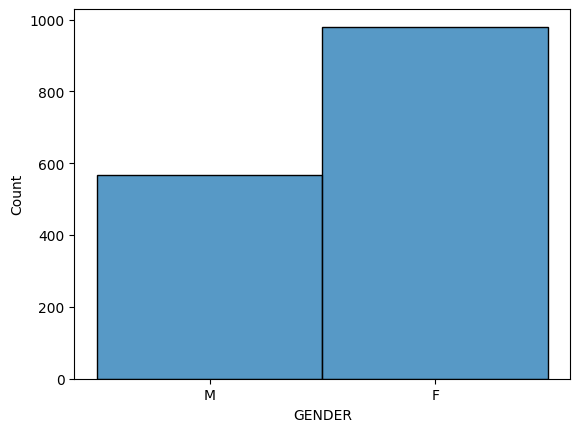

In [199]:
#Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer 

# It is Categorical(Nominal) - Gender
# Defining "Most Frequent" to Null values as it has less than 5% of values.
mode_imputer_gender = SimpleImputer(strategy='most_frequent') 
gender_reshape = np.array(df["GENDER"]).reshape(-1, 1)
df["GENDER"] = mode_imputer_gender.fit_transform(gender_reshape)
sns.histplot(df["GENDER"])

In [200]:
df["GENDER"].value_counts()

#Increase of 7 values in "Female".

F    980
M    568
Name: GENDER, dtype: int64

#####Column : Age

<Axes: xlabel='Age', ylabel='Count'>

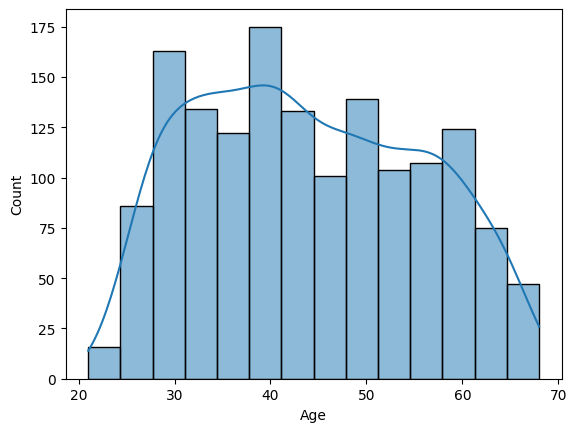

In [201]:
sns.histplot(df["Age"], kde = True)

<Axes: xlabel='Age', ylabel='Count'>

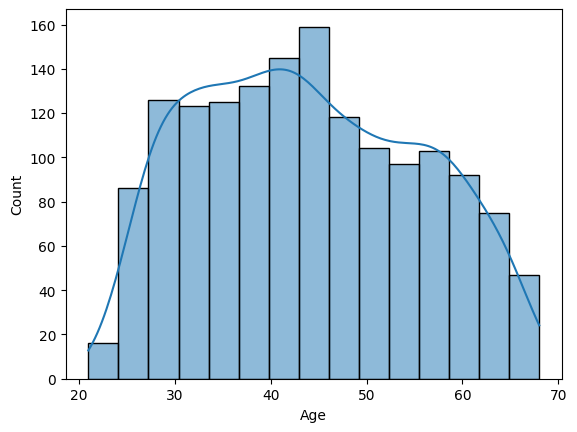

In [202]:
#KNN Imputation : Identifies the neighboring points through a measure of distance and the missing values can be estimated 
#using completed values of neighboring observations.

from sklearn.impute import KNNImputer 
knn_imputer_age = KNNImputer(n_neighbors=5) 
income_reshape = np.array(df["Age"]).reshape(-1, 1)
df["Age"] = knn_imputer_age.fit_transform(income_reshape)
sns.histplot(df["Age"], kde = True)

<Axes: >

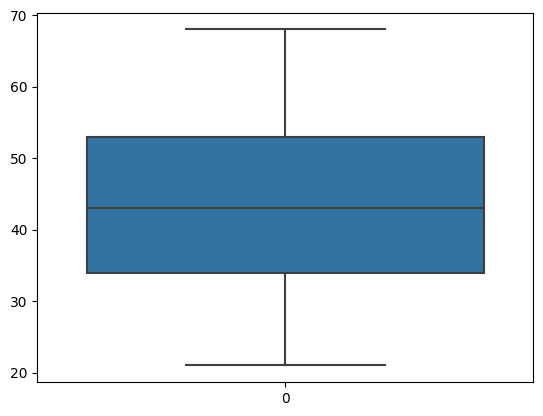

In [203]:
sns.boxplot(df["Age"])

#####Column : Type of Occupation

In [204]:
print("Missing Value in Type of Occupation {} %".format(df['Type_Occupation'].isna().mean()*100))
print("Total Missing Values : ",df['Type_Occupation'].isna().sum())

Missing Value in Type of Occupation 31.52454780361757 %
Total Missing Values :  488


Observation :-
* Type_Occupation has 488 Missing values that is 31.5% of total value in the column.

In [205]:
df["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

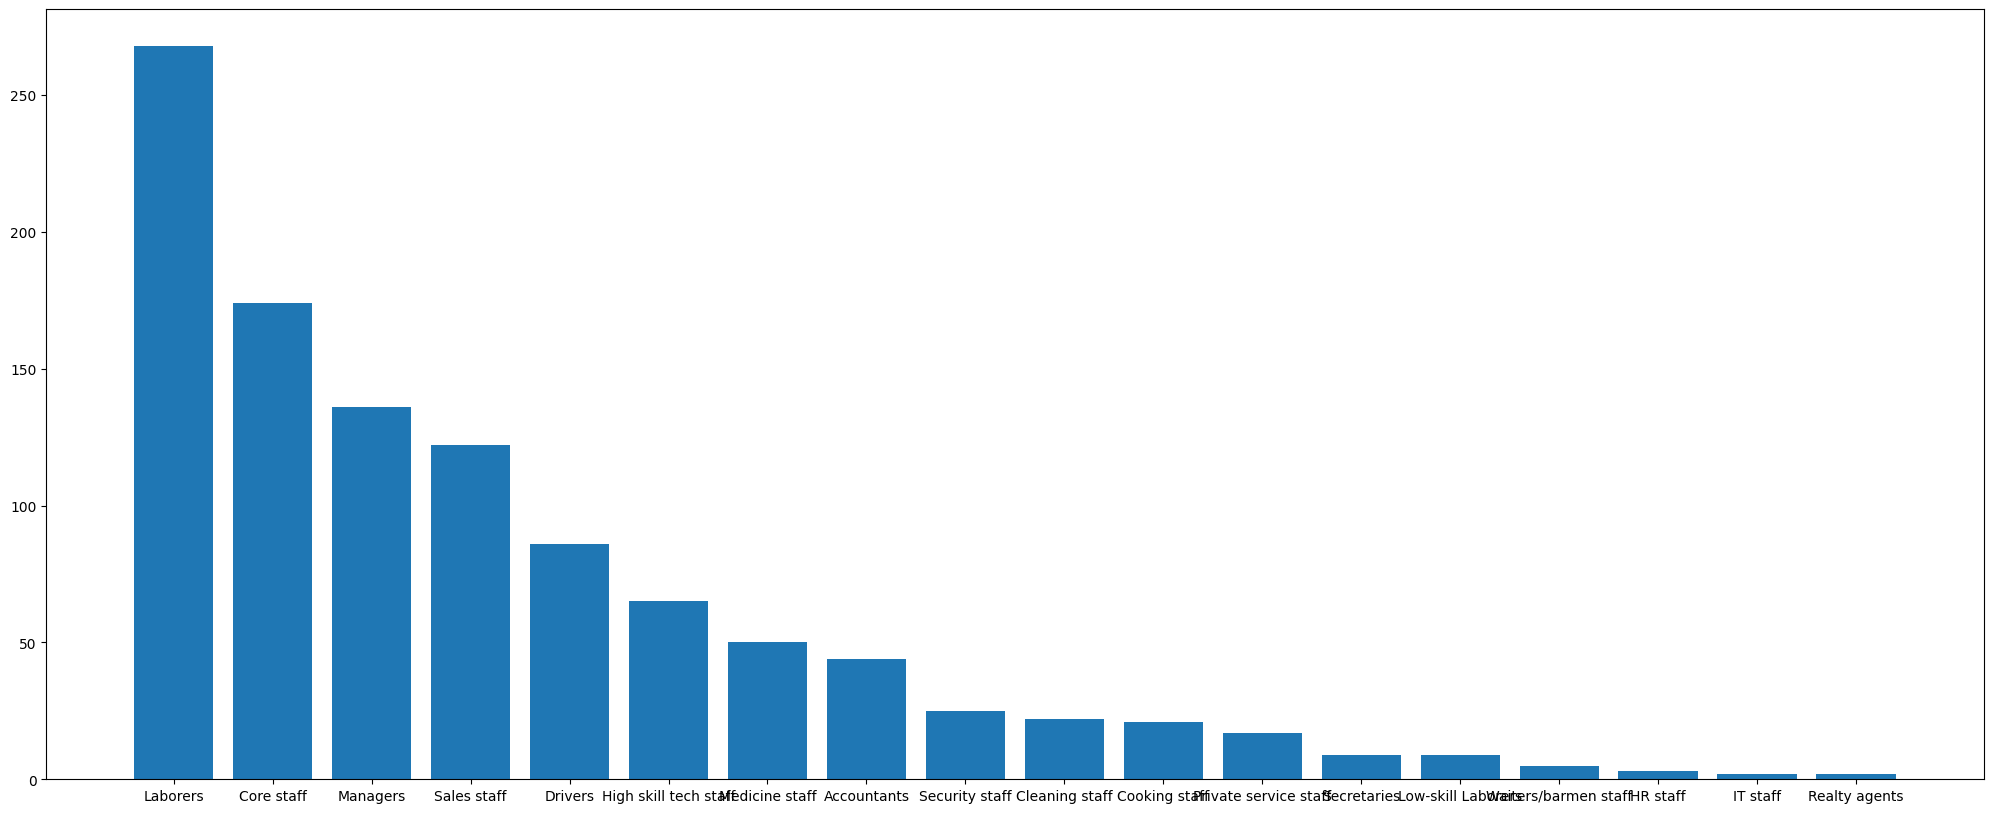

In [206]:
plt.figure(figsize = (25,10))
plt.bar(df["Type_Occupation"].value_counts().index,df["Type_Occupation"].value_counts().values)
plt.show()

In [207]:
df.drop('Type_Occupation', axis = 1, inplace = True)

Obeseravtion :-

* This column has 31.5% of missing values so we are droping this.

###Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

There are various techniques to deal with Outliers :- 
* Trimming
* Capping


These 2 things can be done under these concepts :- 
* Z-Score : Trimming and Capping at (mean ± 3* STD)
* IQR Based Filtering 
* Percentile : Triiming and Capping at (99% and 1%)
* Winsorization : Capping at (99% and 1%)


#####Column : Children

In [208]:
df["CHILDREN"].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

<Axes: xlabel='CHILDREN', ylabel='Count'>

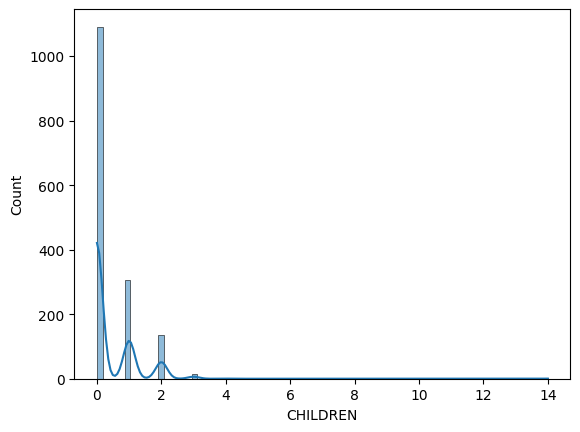

In [209]:
sns.histplot(df["CHILDREN"], kde = True)

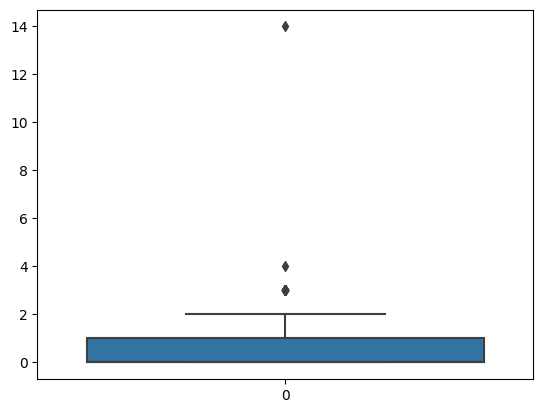

In [210]:
sns.boxplot(df["CHILDREN"])
plt.show() 

In [211]:
q3_child = df["CHILDREN"].quantile(0.75)
q1_child = df["CHILDREN"].quantile(0.25)
iqr_child = q3_child - q1_child
upper_child = q3_child + (1.5*iqr_child)
lower_child = q1_child - (1.5*iqr_child)


outier_child = 0
for i in df["CHILDREN"]:
  if i > upper_child:
    outier_child+=1
print("Total rows removed :",outier_child)


df.drop(df[(df["CHILDREN"]>upper_child)].index, inplace=True)
df.drop(df[(df["CHILDREN"]<lower_child)].index, inplace=True)

Total rows removed : 18


#**EXPLORATORY DATA ANALYSIS**

#####BivariateAnalysis

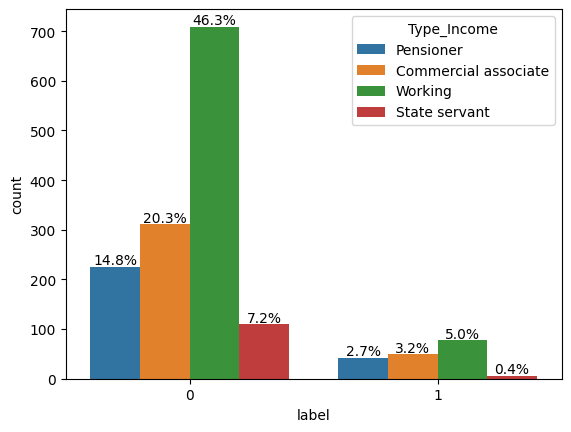

In [212]:
ax = sns.countplot(x = "label", hue = "Type_Income", data = df)

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

Obseravtion

* There are 4 types of Income
    * Pensioner
    *  Commerical Associate
    * Working
    * State Servant
* Ther are more chances of getting Credit Card of "Working" as Compared to Other Income type.

* In the Same Category(Approval), There are **52.28%** more chances to get Credit Card to working professinal.

* There is **88.6%** Credit Card Approved and **11.4%** Rejected on the basis of Income type.

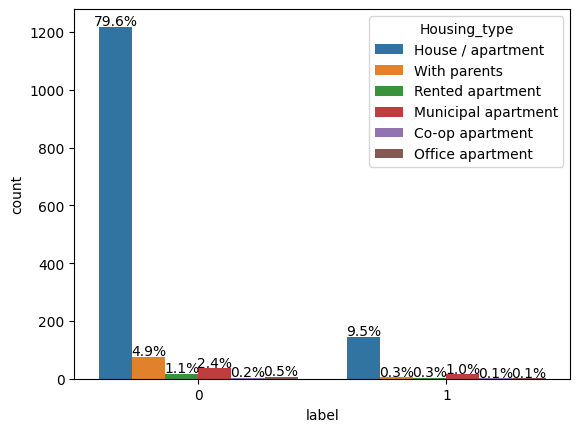

In [213]:
ax = sns.countplot(x = "label", hue = "Housing_type", data = df)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

Obseravtion :- 

* There are 6 types of Housing
    * House/Apartment
    *  With Parents
    * Rented Apartment
    * Municipal Apartment
    * Co-op Apartment
    * Office Apartment
* Ther are more chances of getting Credit Card of "House Apartment" as Compared to Other House type.

* In the Same Category(Approval), There are **89.82%** more chances to get Credit Card to House Apartment. Hence, we can say there is domination of Working in Housing Type. There is chances of removing this column from the dataset.

* There is **88.6%** Credit Card Approved and **11.4%** Rejected on the basis of Housing type.

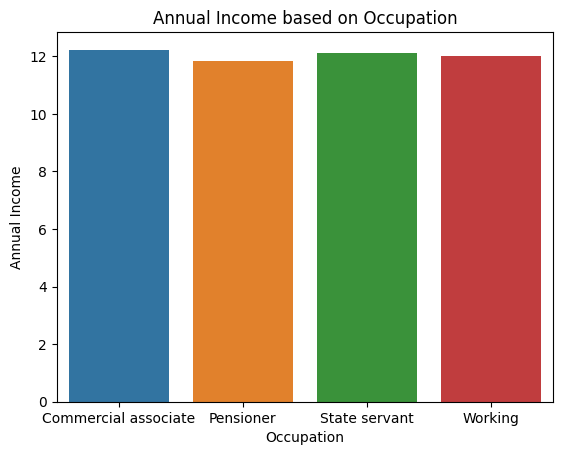

In [214]:
cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).mean()
ax = sns.barplot(x = "Type_Income", y = "Annual_income", data = cat)

for i in ax.patches:
    percentage = '{:.1f}'.format(i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.title("Annual Income based on Occupation")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :- 

* There are 4 types of Income
    * Pensioner
    *  Commerical Associate
    * Working
    * State Servant
* The relationship between "Annual Income" and "Type of Income" show approximately same Statistics of all Income Type ranging from **1.4LPA** to **1.9LPA**. 

Mean of Annual Income by the Age are :
 Experience
(0, 1]    12.006132
(1, 2]    12.066400
(2, 3]    12.100302
(3, 4]    12.177084
(4, 5]    11.962985
(5, 6]    12.010329
Name: Annual_income, dtype: float64 



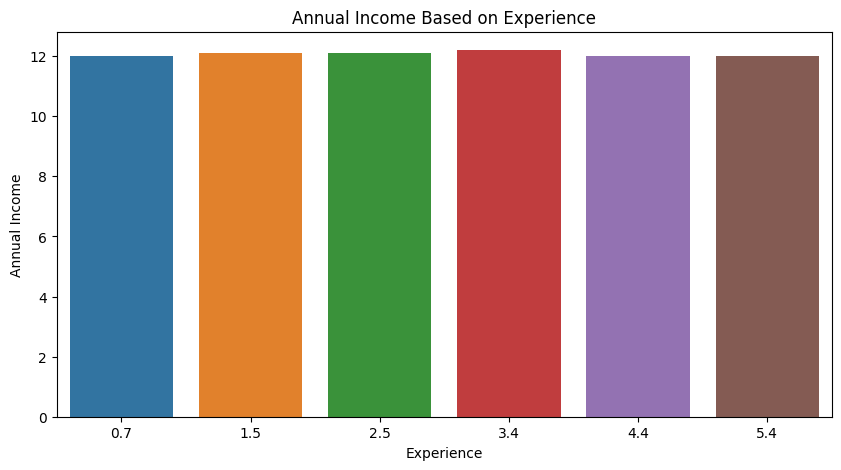

In [215]:
#Cutting the Experience by ranges from 0 to 22 and getting the average annual Income based on the range of Experience.
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,7,1)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["Annual_income"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
cat2 = round(df[['Experience',"Annual_income"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,7,1))), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
ax = sns.barplot(x = "Experience", y = "Annual_income", data = cat2)

for i in ax.patches:
    percentage = '{:.1f}'.format(i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
  
plt.title("Annual Income Based on Experience")
plt.xlabel("Experience")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :- 

* Highest Average Income observed from the chart ranging between 9 to 12 years of Experience that is 2.02 LPA.

* Lowest or Average Income observed is around 1.6LPA.

Mean of Annual Income by the Age are :
 Age
(20, 30]    12.087087
(30, 40]    12.067362
(40, 50]    12.113824
(50, 60]    11.953605
(60, 70]    11.853051
Name: Annual_income, dtype: float64 



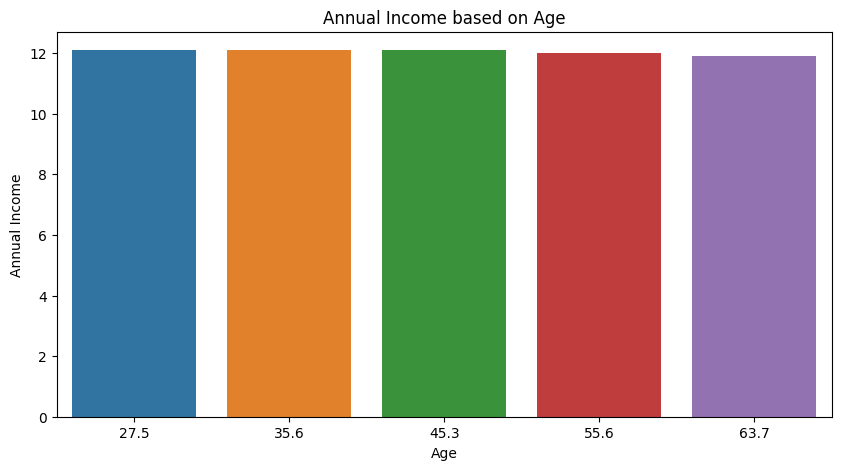

In [216]:
#Cutting the bins from 20 to 70 in 10 each part to get the  average annual income.
age = pd.cut(df["Age"], bins = [20,30,40,50,60,70])
print("Mean of Annual Income by the Age are :\n",df.groupby(age)["Annual_income"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
cat4 = round(df[['Age',"Annual_income"]].groupby(pd.cut(df["Age"], bins = [20,30,40,50,60,70]), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
ax = sns.barplot(x = "Age", y = "Annual_income", data = cat4)

for i in ax.patches:
    percentage = '{:.1f}'.format(i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.title("Annual Income based on Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

Obseravtion :-

* The relationship between "Annual Income" and "Age" show approximately same Statistics of all Income Type ranging from **1.5LPA** to **1.8LPA**.

#####Multivariate Analysis

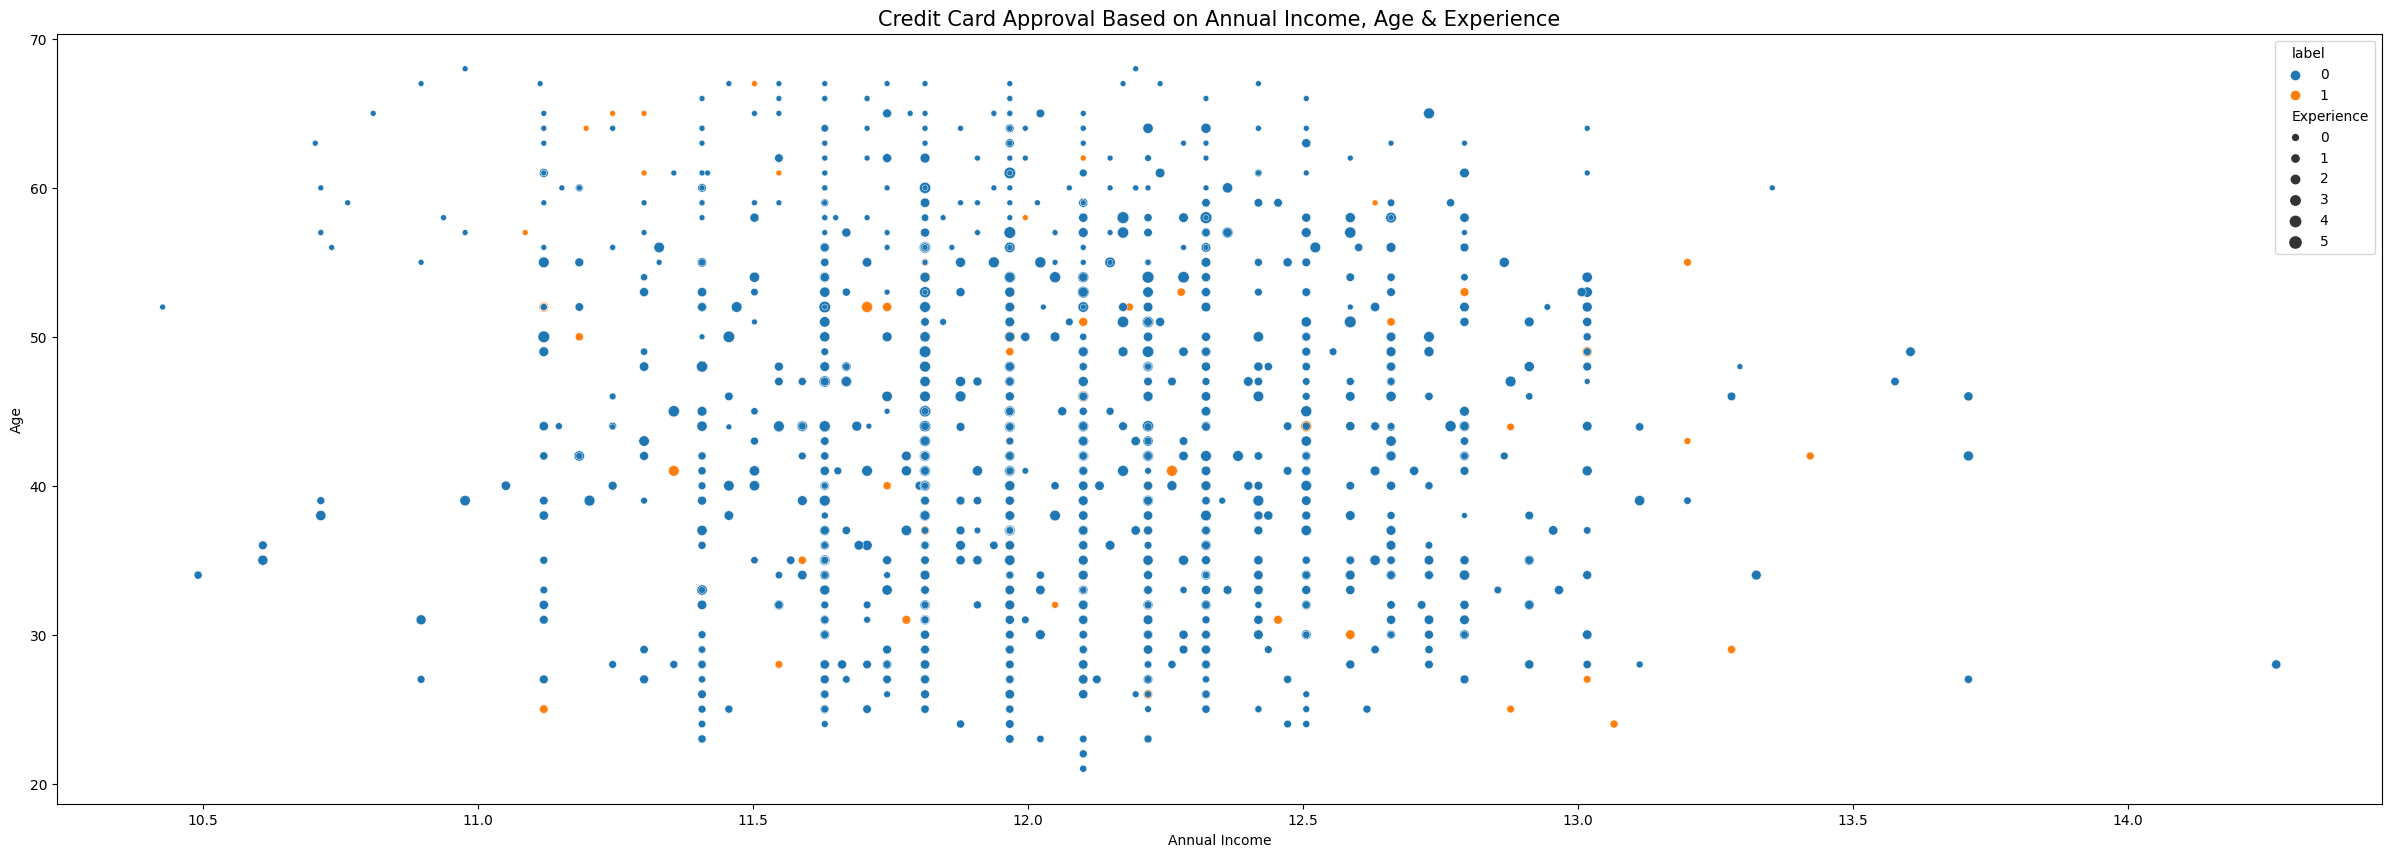

In [217]:
plt.figure(figsize = (30,10))

#Plotting "Age" and "Annual Income" plot on the basis of label and Experience.
sns.scatterplot(x = df['Annual_income'],y = df["Age"], hue = df["label"], size = df["Experience"])
plt.title("Credit Card Approval Based on Annual Income, Age & Experience", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.show()

Obseravtion :- 

* Experience is divided into 0-4, 4-8, 8-12, 12-16 years with the label encoded 0(Approved) or 1(Rejected).
* There is high probabity to get the Credit Card Approval in the Age group 22 to 60 years.

* Annual Income ranging from 1LPA to (2-2.5)LPA also shows high chances to get the Credit Card Approval.

Conclusion :-

* Those people who have **4 to 16 years of Experience** and **Age 30-55 years** and **Annual Income ranging from 1.5 to 2 LPA** has High probabity to get the Credit Card Approval.

* From this, we can say **"Age"**, **"Experience"** and **"Annual Income"** are Crucial Features for the Feature Selection.


Mean of Annual Income by the Age are :
 Experience
(0, 2]      0.165631
(2, 4]      0.075188
(4, 6]      0.073770
(6, 8]           NaN
(8, 10]          NaN
(10, 12]         NaN
(12, 14]         NaN
(14, 16]         NaN
(16, 18]         NaN
(18, 20]         NaN
Name: label, dtype: float64 



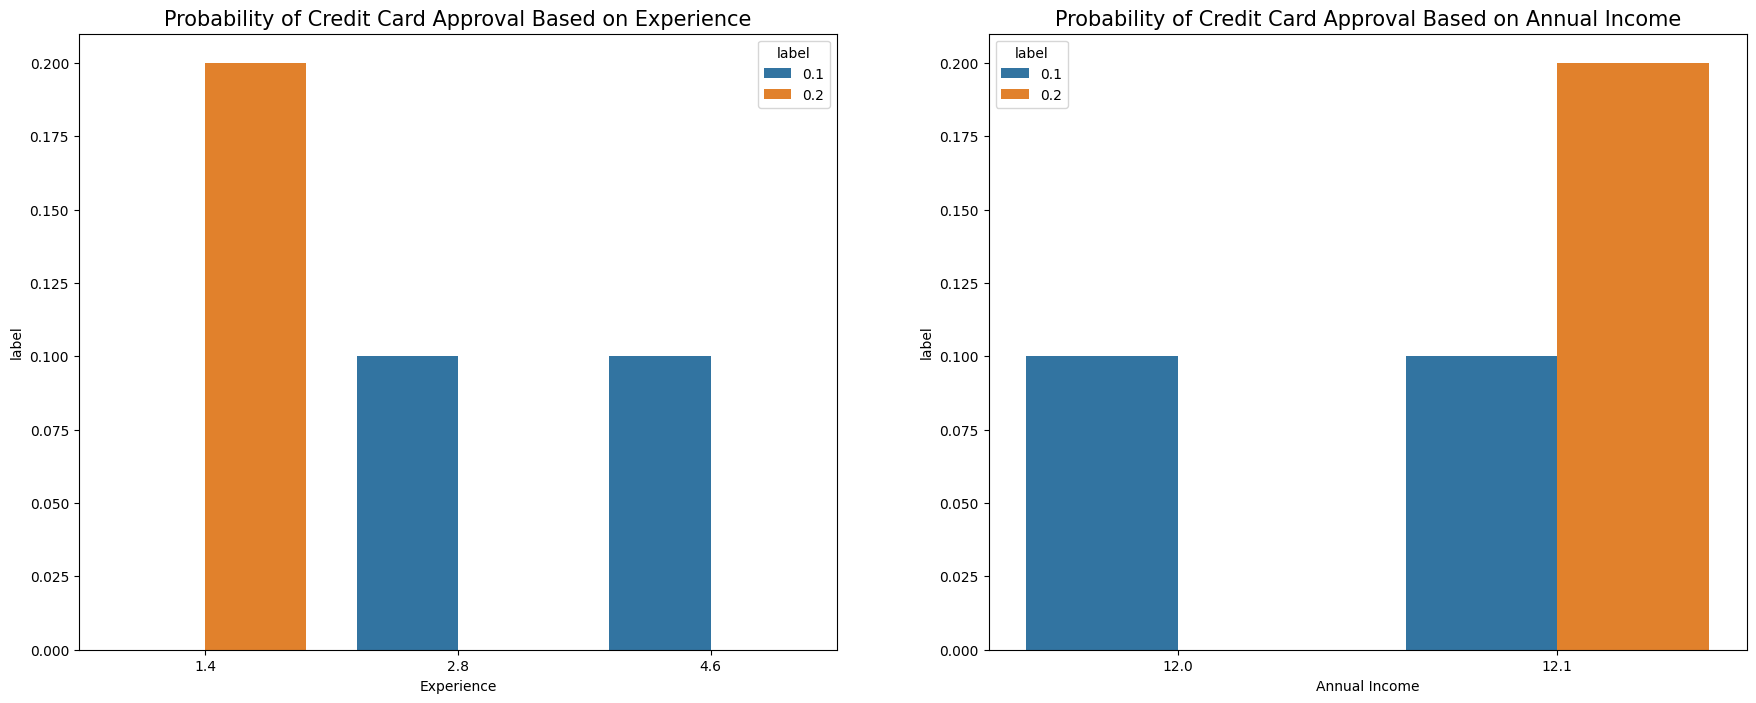

In [218]:
exp1 = pd.cut(df["Experience"], bins = list(np.arange(0,22,2)))
print("Mean of Annual Income by the Age are :\n",df.groupby(exp1)["label"].mean(),"\n")

cat3 = round(df[['Experience',"Annual_income", "label"]].groupby(pd.cut(df["Experience"], bins = list(np.arange(0,22,2))), as_index=False).mean(),1)
plt.figure(figsize =(45,8))

plt.subplot(1, 4, 1)
sns.barplot(x = "Experience", y = "label", data = cat3, hue = "label")
plt.title("Probability of Credit Card Approval Based on Experience", fontsize = 15)
plt.xlabel("Experience")
plt.ylabel("label")

plt.subplot(1, 4, 2)
sns.barplot(x = "Annual_income", y = "label", data = cat3, hue = "label")
plt.title("Probability of Credit Card Approval Based on Annual Income", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("label")
plt.show()

**OBSERVATIONS :-**
* People have 0 to 4 Year of Experience have 20% chances to get the Credit Card.
* Salary between 1.7 Lakhs to 2.25 Lakhs has 10% chances to get Credit Card.
* Salary between 1.9 to 2 Lakhs Lakhs has 20% chances to get Credit Card.

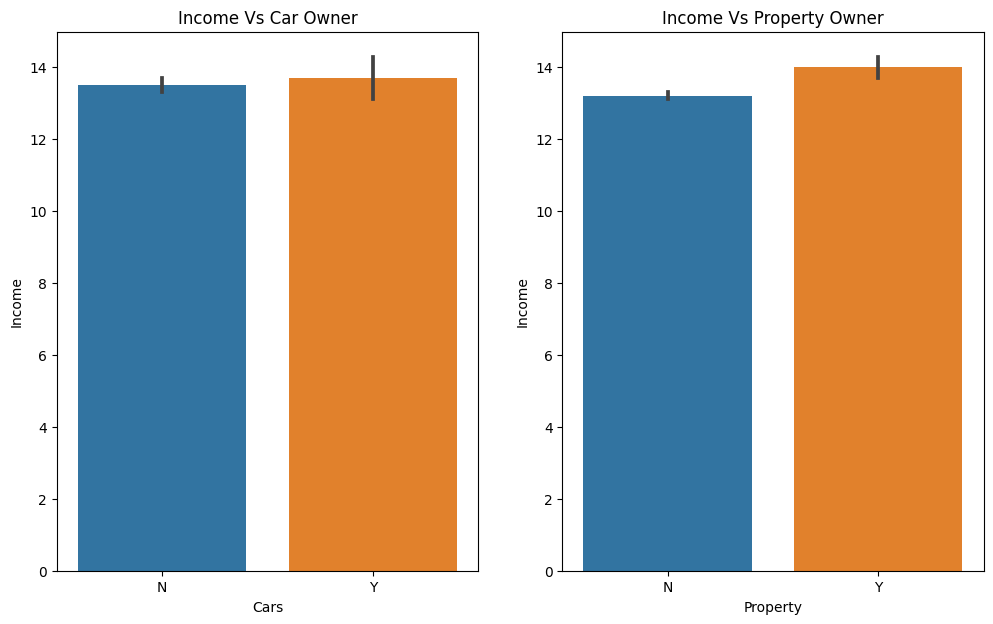

In [219]:
cat1 = df[["Car_Owner","Propert_Owner", "Annual_income"]].groupby(['Car_Owner','Propert_Owner'], as_index=False).agg({'Annual_income':'count','Annual_income':'max'})

plt.figure(figsize = (25,7))
plt.subplot(1, 4, 1)
ax = sns.barplot(x= "Car_Owner", y = "Annual_income", data = cat1)
for i in ax.patches:
    percentage = '{:.1f}'.format(100 * i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.title("Income Vs Car Owner")
plt.xlabel("Cars")
plt.ylabel("Income")

plt.subplot(1, 4, 2)
ax = sns.barplot(x = "Propert_Owner", y = "Annual_income", data = cat1)
for i in ax.patches:
    percentage = '{:.1f}'.format(100 * i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.title("Income Vs Property Owner")
plt.xlabel("Property")
plt.ylabel("Income")
plt.show()

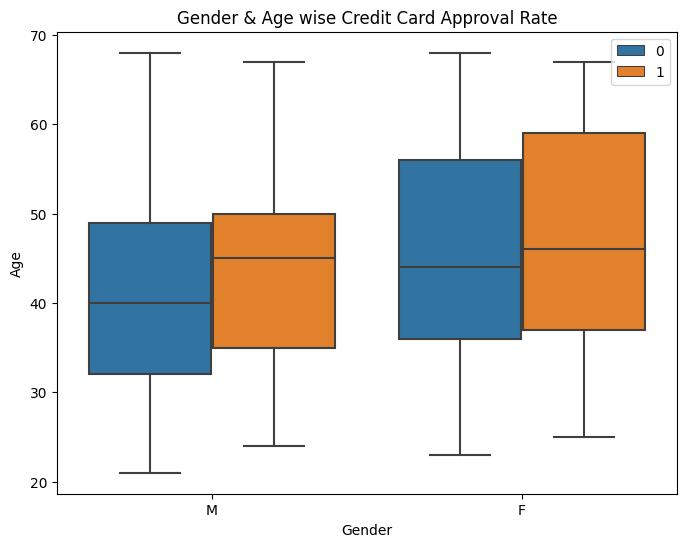

              GENDER
label GENDER        
0     F          870
      M          486
1     F           99
      M           75


In [220]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "GENDER", y = "Age", data = df, hue = "label")
plt.title("Gender & Age wise Credit Card Approval Rate")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(loc = "upper right")
plt.show()

print(df.groupby(["label", "GENDER"])[["GENDER"]].count())

**OBSERVATIONS :-**
* Male has 35.84% chances and Female with **64.16%** chances to get the Credit Card Approval.
* From all dataset, Female has **56.86%** chances and Male has **31.76%** chances to get Credit Card Approval.

**Conclusions :-**

* From the observation, we can say that "Female" can claim Credit Card on the ratio of **0.8 times more** than "Male".

#**FEATURE SCALING**

* Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.

####Feature Selection


* Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [243]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Age,Experience,Family_Members,label
0,M,Y,Y,0,12.100712,Pensioner,Higher education,House / apartment,51.000000,0.000000,2,1
1,F,Y,N,0,12.660328,Commercial associate,Higher education,House / apartment,37.000000,1.264911,2,1
2,F,Y,N,0,12.660328,Commercial associate,Higher education,House / apartment,43.952818,1.264911,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,House / apartment,37.000000,1.264911,2,1
4,F,Y,N,0,12.660328,Commercial associate,Higher education,House / apartment,37.000000,1.264911,2,1


In [248]:
df["Annual_income"].isna().sum()

23

In [221]:
#"Corr" use to get the relationship between all numerical variables.
## It ranges between -1 to 1.
## 0 to 1 indicates : Directly correlated with each other.
## -1 to 0 indicates : Inversly correlated with each other.
df.corr()

,Ind_ID,CHILDREN,Annual_income,Age,Experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.035999,0.010696,-0.022275,0.025341,NaN,0.084660,0.010398,-0.036772,0.016130,0.015775
CHILDREN,0.035999,1.000000,0.077182,-0.323197,0.158930,NaN,0.041032,-0.000316,0.041608,0.859850,-0.016617
Annual_income,0.010696,0.077182,1.000000,-0.129939,0.154572,NaN,-0.069047,-0.014129,0.128075,0.051906,0.020485
Age,-0.022275,-0.323197,-0.129939,1.000000,-0.254329,NaN,-0.172956,0.029518,-0.166900,-0.285569,0.042558
Experience,0.025341,0.158930,0.154572,-0.254329,1.000000,NaN,0.176281,0.012885,-0.007335,0.184064,-0.096117
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.084660,0.041032,-0.069047,-0.172956,0.176281,NaN,1.000000,0.348948,-0.007897,0.081377,-0.005339
Phone,0.010398,-0.000316,-0.014129,0.029518,0.012885,NaN,0.348948,1.000000,0.019987,0.010921,0.000926
EMAIL_ID,-0.036772,0.041608,0.128075,-0.166900,-0.007335,NaN,-0.007897,0.019987,1.000000,0.047479,0.013133
Family_Members,0.016130,0.859850,0.051906,-0.285569,0.184064,NaN,0.081377,0.010921,0.047479,1.000000,-0.027286


In [222]:
#Droping soem columns which as least chances or no chances to increase accuracy of ML model.
df.drop(["Ind_ID", "Marital_status", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID"], axis=1, inplace =True)

In [223]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["label"], axis=1)
y = df["label"]

In [224]:
#To the dummy columns from all unique values in each columns.
X1 = pd.get_dummies(X)

In [225]:
#Importing ExtratreeRegressor from sklearn
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X1,y)

ValueError: ignored

In [ ]:
#Getting all the feature importances with target variable.
print(model.feature_importances_)

In [ ]:
#plotting all the important columns which are related to target variable.
feat_important = pd.Series(model.feature_importances_, index = X1.columns)
plt.figure(figsize= (30,10))
#Plotting TOP-20 Columns from the Dummy variable "X1".
feat_important.nlargest(20).plot(kind="barh")
plt.show()

**OBSERVATION**
* TOP-20 column are correlated to target variable.
* Top 5 are list below:- 
  * Age
  * Annual Income
  * Experience
  * Family Members 
  * Children

####Splitting Data

In [226]:
#Splitting into training and test dataset with 75% and 25% on random state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [227]:
#Getting the shape of training and test dataset.
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (1147, 11) (1147,)
Test :  (383, 11) (383,)


In [228]:
X_train.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Age,Experience,Family_Members
1152,F,N,Y,0,11.407565,Pensioner,Secondary / secondary special,House / apartment,58.0,0.000000,1
1418,F,N,N,0,12.100712,Working,Incomplete higher,House / apartment,54.0,2.280351,1
922,M,N,N,0,11.967181,Working,Secondary / secondary special,House / apartment,48.0,3.146427,2
1301,M,N,Y,0,11.356272,State servant,Secondary / secondary special,Co-op apartment,45.0,4.888763,1
810,M,Y,N,1,11.502875,Pensioner,Secondary / secondary special,House / apartment,51.0,0.000000,3


In [229]:
# from imblearn.over_sampling import SMOTE

# # Defining Resampling method
# smote = SMOTE(random_state =0, k_neighbors = 3)

# # Fitting and resampling training data values
# x_train_sm, y_train_sm = smote.fit_resample(X_train.values, y_train.values)

####Categorical Encoding

* Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

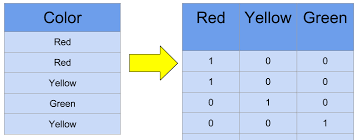

In [230]:
# Importing ColumnTransformer, OneHotEncoder & OrdinalEncoder.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


transformer = ColumnTransformer(transformers = [
        ("cat1", OneHotEncoder(sparse = False, drop = "first"), [0,1,2,5,7]),
        ("cat2", OrdinalEncoder(categories=[["Incomplete higher", "Lower secondary", "Secondary / secondary special", 
                                             "Academic degree", "Higher education"]]), [6])
                ], remainder= "passthrough")



#Using fit_transform to the train data.
X_train = transformer.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = transformer.transform(X_test)

####Standardization

* This technique is to re-scale features value with the distribution value between 0 and 1 is useful for the optimization algorithms, such as gradient descent, that are used within machine learning algorithms that weight inputs.
    * Normalization - Here we use Min-Max Scaler formula in scaling.
    * Standardization - Here we use Z-Score formula in scaling.

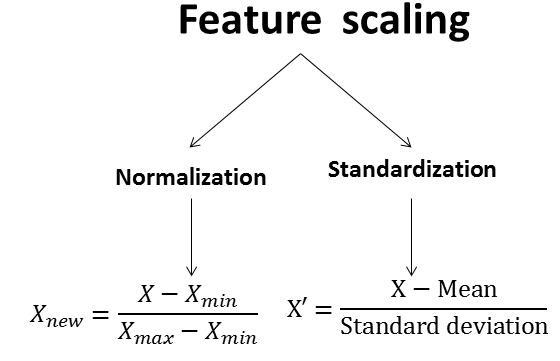

In [231]:
#Importing Standardization from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

#**MODEL SELECTION**

##**LOGISTIC REGRESSION**

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [232]:
#Importing Logistic Regression from sklearn.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#Fitting the training independent and dependent variable to get trained.
log_reg.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_log = log_reg.predict(X_test)

ValueError: ignored

In [ ]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Calculating the accuracy for the predicted and actual dataset.
Log_reg_untune = accuracy_score(y_pred_log, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_log, y_test)*100)))

Accuracy of Logistic Regression Model : 88%


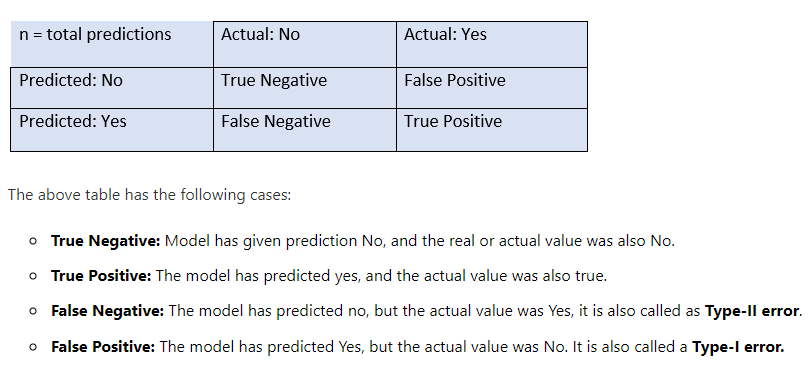

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_log, y_test)

array([[337,  43],
       [  2,   1]])

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "337" people get approval of credit card.
  * TN - "1" people not get approval of credit card.
  * FP - "43" people not get approval of credit card but model predicted they will get.
  * FN - "2" people get approval of credit card  but model predicted they will not get.

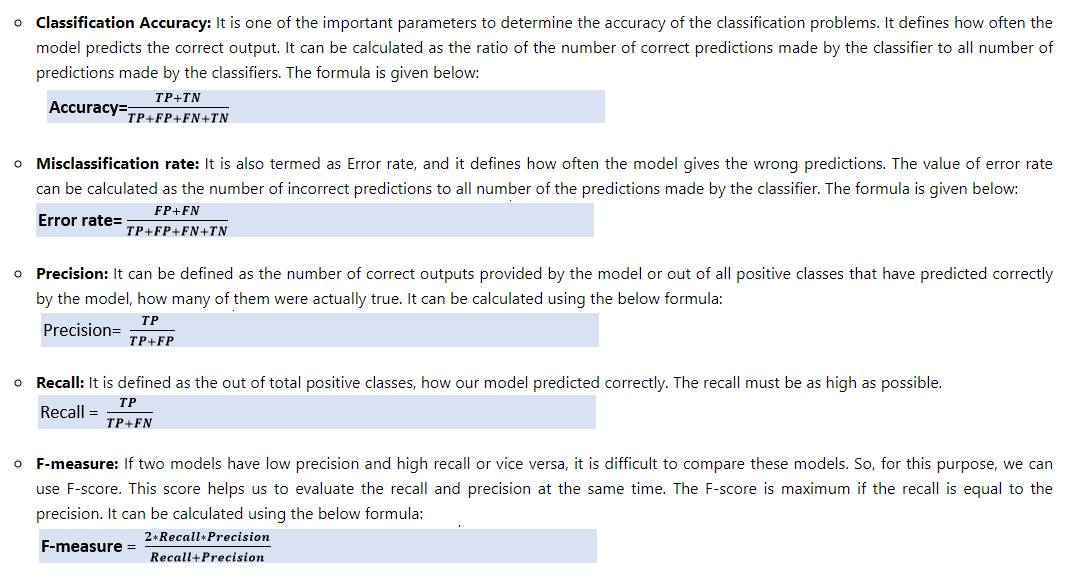

In [ ]:
#Getting the Classification report for precision, recall & f1-score value.
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_log, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       380
           1       0.02      0.33      0.04         3

    accuracy                           0.88       383
   macro avg       0.51      0.61      0.49       383
weighted avg       0.99      0.88      0.93       383



<Axes: xlabel='label', ylabel='Density'>

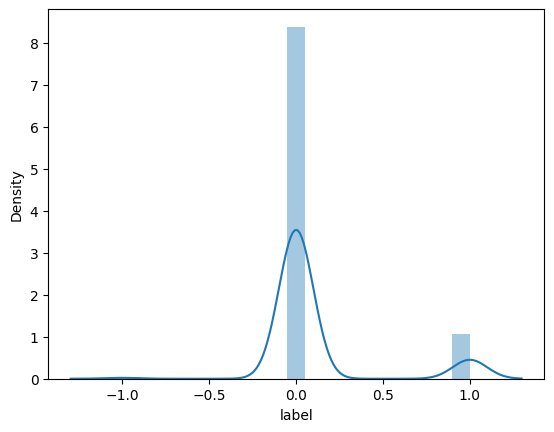

In [ ]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_log)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are some noise(error) at 1(value).

#####Hyperparameter Tuning for Logistic Regression

* Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [ ]:
#Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [ ]:
#Fitting the training independent and dependent variable to get trained.
Classfier_Reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
#Getting the best parameter from gridsearchcv
print(Classfier_Reg.best_params_)

#getting the best score for training the model.
print(Classfier_Reg.best_score_)

#Predicting the result foe the test dataset "X_test".
y_pred__log_tune = Classfier_Reg.predict(X_test)

{'C': 3, 'max_iter': 100, 'penalty': 'l2'}
0.8866666666666665


In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
Log_reg_tune = accuracy_score(y_pred__log_tune, y_test)*100
round(accuracy_score(y_pred__log_tune, y_test)*100)

88

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred__log_tune, y_test)

array([[337,  43],
       [  2,   1]])

In [ ]:
#Getting the Classification report for precision, recall & f1-score value.
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred__log_tune, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       380
           1       0.02      0.33      0.04         3

    accuracy                           0.88       383
   macro avg       0.51      0.61      0.49       383
weighted avg       0.99      0.88      0.93       383



**OBSERVATION** 
* After tuning, accuracy, precision, recall & F1-Score remain same.

##**DECISION TREE CLASSIFIER**

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
#Importing DecisionTreeClassifier from sklearn.
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

#Fitting the training independent and dependent variable to get trained.
dec_tree.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_dec = dec_tree.predict(X_test)

In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

85.6396866840731

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_dec, y_test)

array([[308,  24],
       [ 31,  20]])

In [ ]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_dec, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       332
           1       0.45      0.39      0.42        51

    accuracy                           0.86       383
   macro avg       0.68      0.66      0.67       383
weighted avg       0.85      0.86      0.85       383



**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "305" people get approval of credit card.
  * TN - "19" people not get approval of credit card.
  * FP - "25" people not get approval of credit card but model predicted they will get.
  * FN - "34" people get approval of credit card  but model predicted they will not get.

<Axes: xlabel='label', ylabel='Density'>

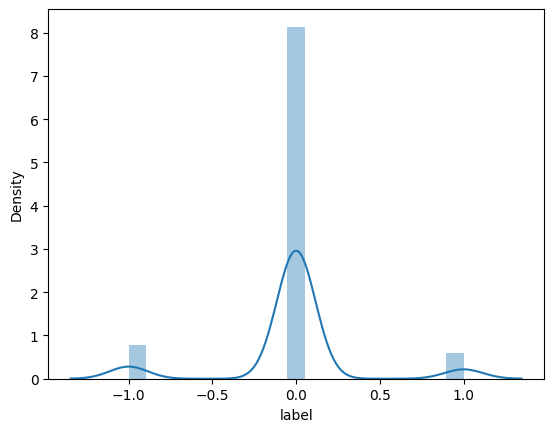

In [ ]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_dec)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1 & -1(value).

#####Hyper Parameter Tuning for Decision Tree Classifier

In [ ]:
#Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=10)

* Criterion for impurity of feature will be selected based on - "gini", "entropy" or "log loss"
* Splitter use for best split after every feature selected b Information Gain.
* Max_depth use for how much depth we want to go in dividing the feature for purity.
* min_samples_split use for the minimum number of samples for each split.
* min_samples_leaf use for the minimum number of samples for each node.
* max_feature is the number of features to consider when looking for the best split.
* max_leaf_nodes use to control how much leaf nodes we required.,
* ccp_alpha - Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.

In [ ]:
#Fitting the training independent and dependent variable to get trained.
Classfier_dtc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
#Getting the best parameter from gridsearchcv
print(Classfier_dtc.best_params_)

#getting the best score for training the model.
print(Classfier_dtc.best_score_)

#Predicting the result foe the test dataset "X_test".
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}
0.8866590389016018


In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
dec_tree_tune = accuracy_score(y_pred_tune_dtc, y_test)*100
accuracy_score(y_pred_tune_dtc, y_test)*100

88.51174934725849

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_tune_dtc, y_test)

array([[339,  44],
       [  0,   0]])

In [ ]:
#Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       383
           1       0.00      0.00      0.00         0

    accuracy                           0.89       383
   macro avg       0.50      0.44      0.47       383
weighted avg       1.00      0.89      0.94       383



##**KNN**

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called **a lazy learner algorithm** because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [ ]:
#Importing KNeighborsClassifier from sklearn.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Fitting the training independent and dependent variable to get trained.
knn.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_knn = knn.predict(X_test)

In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

87.46736292428199

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_knn, y_test)

array([[332,  41],
       [  7,   3]])

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "330" people get approval of credit card.
  * TN - "5" people not get approval of credit card.
  * FP - "39" people not get approval of credit card but model predicted they will get.
  * FN - "9" people get approval of credit card  but model predicted they will not get.

In [ ]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_knn, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       373
           1       0.07      0.30      0.11        10

    accuracy                           0.87       383
   macro avg       0.52      0.60      0.52       383
weighted avg       0.96      0.87      0.91       383



<Axes: xlabel='label', ylabel='Density'>

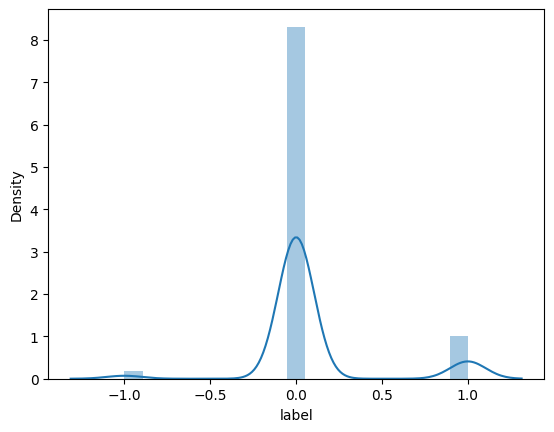

In [ ]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_knn)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#####Hyper Parameter Tuning for KNN

In [ ]:
#Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=10)

In [ ]:
#Fitting the training independent and dependent variable to get trained.
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#Getting the best parameter from gridsearchcv.
print(Classfier_knn.best_params_)

#getting the best score for training the model.
print(Classfier_knn.best_score_)

#Predicting the result foe the test dataset "X_test".
y_pred_tune_knn = Classfier_knn.predict(X_test)

{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}
0.9180625476735317


In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
knn_tune = accuracy_score(y_pred_tune_knn, y_test)*100
accuracy_score(y_pred_tune_knn, y_test)*100

91.12271540469973

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_tune_knn, y_test)

array([[338,  33],
       [  1,  11]])

In [ ]:
#Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       371
           1       0.25      0.92      0.39        12

    accuracy                           0.91       383
   macro avg       0.62      0.91      0.67       383
weighted avg       0.97      0.91      0.93       383



##**RANDOM FOREST CLASSFIER**

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
#Importing RandomForestClassifier from sklearn.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

#Fitting the training independent and dependent variable to get trained.
random_forest.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_rfc = random_forest.predict(X_test)

In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

91.64490861618799

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_rfc, y_test)

array([[337,  30],
       [  2,  14]])

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "337" people get approval of credit card.
  * TN - "16" people not get approval of credit card.
  * FP - "28" people not get approval of credit card but model predicted they will get.
  * FN - "2" people get approval of credit card  but model predicted they will not get.

In [ ]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_rfc, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       367
           1       0.32      0.88      0.47        16

    accuracy                           0.92       383
   macro avg       0.66      0.90      0.71       383
weighted avg       0.97      0.92      0.93       383



<Axes: xlabel='label', ylabel='Density'>

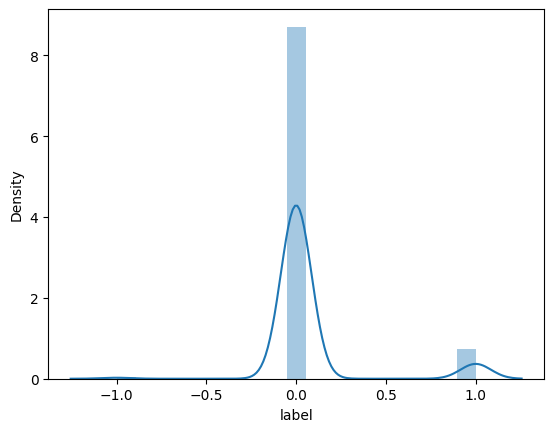

In [ ]:
sns.distplot(y_test - y_pred_rfc)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#####Hyper Parameter Tuning for Random Forest Classifier

In [ ]:
#Importing GridSearchCV from sklearn.
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest,param_grid=parameter_rfc, scoring="accuracy", cv=10)

In [ ]:
#Fitting the training independent and dependent variable to get trained.
Classfier_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [ ]:
#Getting the best parameter from gridsearchcv.
print(Classfier_rfc.best_params_)

#getting the best score for training the model.
print(Classfier_rfc.best_score_)

#Predicting the result foe the test dataset "X_test".
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 12}
0.9154309687261633


In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
random_forest_tune = accuracy_score(y_pred_tune_rfc, y_test)*100
accuracy_score(y_pred_tune_rfc, y_test)*100

90.86161879895562

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_rfc, y_test)

array([[337,  30],
       [  2,  14]])

In [ ]:
#Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       370
           1       0.25      0.85      0.39        13

    accuracy                           0.91       383
   macro avg       0.62      0.88      0.67       383
weighted avg       0.97      0.91      0.93       383



##**XGBOOST**

In [ ]:
#Importing XGBoost.
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

#Fitting the training independent and dependent variable to get trained.
xgb_classifier.fit(X_train,y_train)

#Predicting the result foe the test dataset "X_test".
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
#Calculating the accuracy for the predicted and actual dataset.
accuracy_score(y_pred_xgb, y_test)*100

90.86161879895562

In [ ]:
#Calculating for the confusion matrix.
confusion_matrix(y_pred_xgb, y_test)

array([[332,  28],
       [  7,  16]])

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "332" people get approval of credit card.
  * TN - "17" people not get approval of credit card.
  * FP - "27" people not get approval of credit card but model predicted they will get.
  * FN - "7" people get approval of credit card  but model predicted they will not get.

In [ ]:
#Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_xgb, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       360
           1       0.36      0.70      0.48        23

    accuracy                           0.91       383
   macro avg       0.67      0.81      0.71       383
weighted avg       0.94      0.91      0.92       383



<Axes: xlabel='label', ylabel='Density'>

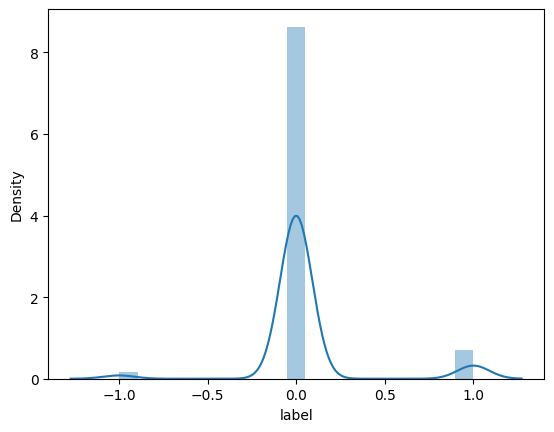

In [ ]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_xgb)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#**ACCURACY : GRAPH**

#####Baseline Model Graph

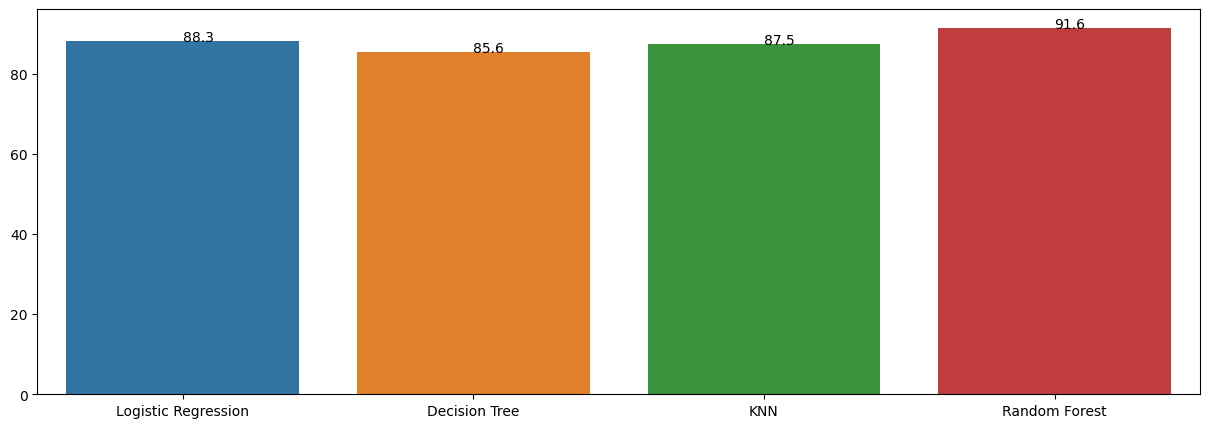

In [ ]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_untune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "left")
sns.barplot(x= Algo, y = untuned_algo)
addlabels_untune(Algo, Algo_value_untune)

#####Tuned Algorithm Graph

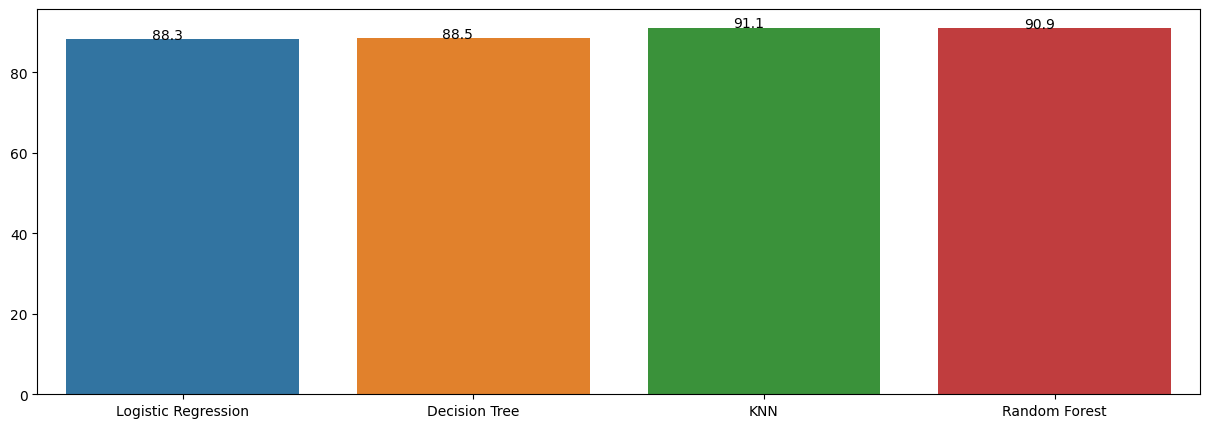

In [ ]:
tuned_algo = [Log_reg_tune, dec_tree_tune, knn_tune, random_forest_tune]
Algo_value_tune = []
for i in tuned_algo:
  Algo_value_tune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_tune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "right")
sns.barplot(x = Algo, y = Algo_value_tune)
addlabels_tune(Algo, Algo_value_tune)

#####Comparision 

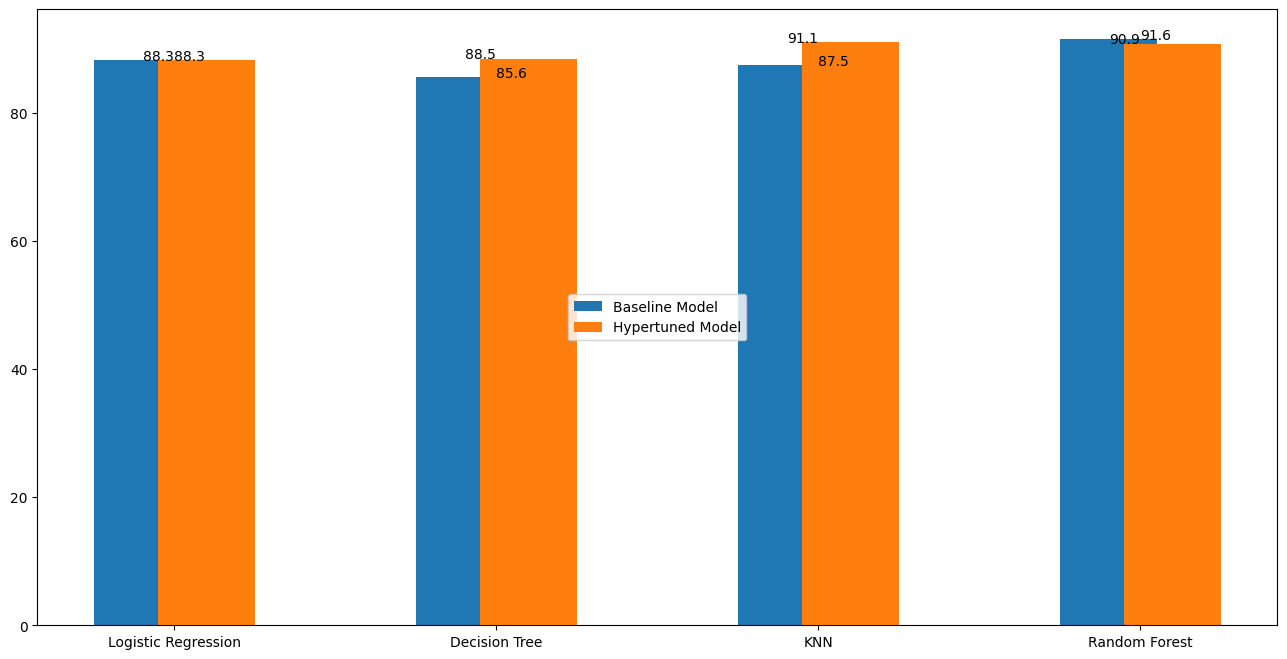

In [ ]:
plt.figure(figsize=(16,8))
X_label_algo = np.arange(len(Algo))
plt.bar(X_label_algo-0.1, untuned_algo, 0.3, label = "Baseline Model")
plt.bar(X_label_algo+0.1, tuned_algo, 0.3, label = "Hypertuned Model" )
plt.xticks(X_label_algo, Algo)
plt.legend(loc = "center")
addlabels_tune(Algo, Algo_value_tune)
addlabels_untune(Algo, Algo_value_untune)

#**CONCLUSION**

* From all the models, Random Forest untuned Model, XGBoost and KNN tuned Model has better prediction.



  * For **Random Forest "untuned" Model** :-
      * FN(False Negative) **reduced to 71.4%** from XGBoost Model.
      * Precision is **91.8%** which is good.
      * Recall is **99.4%** which is great.
      * F1-Score is **95.4%**, it is good.
      * Accuracy is **91.95%**.



  * For **KNN "tuned" Model** :- 
      * FP(False Positive) reduced to 20% and FN(False Negative) reduced to 55% which improved from untuned Model.
      * Precision is **91.28%** which is good.
      * Recall is **98.8%** which is great.
      * F1-Score is **95.4%**, it is good.
      * Accuracy is **90.6%**.
    
  * For **XGBoost Model** :-  
      * FP(False Positive) **reduced to 10%** from Random Forest Model.
      * Precision is **92.48%** which is (**Highest**)good.
      * Recall is **97.95%** which is great.
      * F1-Score is **95.2%**, it is good.
      * Accuracy is **91.12%**.

  * From Random Forest, XGBoost and KNN Algorithm, **Random Forest and XGBoost gives better prediction and less error**.
    * **Random Forest Model give better Recall and Accuracy**.
    * **XGBoost Model give better Precision so the error reduces**.
